<a href="https://colab.research.google.com/github/Abineshabee/Demons/blob/main/demon233.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()

df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/dataset.csv")
print(df.head())
df.shape



  Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  EDUC  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87    14   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88    14   
2  OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75    12   
3  OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76    12   
4  OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80    12   

   SES  MMSE  CDR  eTIV   nWBV    ASF  
0  2.0  27.0  0.0  1987  0.696  0.883  
1  2.0  30.0  0.0  2004  0.681  0.876  
2  NaN  23.0  0.5  1678  0.736  1.046  
3  NaN  28.0  0.5  1738  0.713  1.010  
4  NaN  22.0  0.5  1698  0.701  1.034  


(373, 15)

             Visit  MR Delay       Age      EDUC       SES      MMSE  \
Visit     1.000000  0.920009  0.183213  0.024615 -0.051622 -0.029078   
MR Delay  0.920009  1.000000  0.205357  0.051630 -0.030813  0.065844   
Age       0.183213  0.205357  1.000000 -0.027886 -0.046857  0.055612   
EDUC      0.024615  0.051630 -0.027886  1.000000 -0.722647  0.194884   
SES      -0.051622 -0.030813 -0.046857 -0.722647  1.000000 -0.149219   
MMSE     -0.029078  0.065844  0.055612  0.194884 -0.149219  1.000000   
CDR       0.002325 -0.062915 -0.026257 -0.153121  0.076160 -0.686519   
eTIV      0.117428  0.119624  0.042348  0.257015 -0.261575 -0.032084   
nWBV     -0.126682 -0.105586 -0.518359 -0.012200  0.090095  0.341912   
ASF      -0.120399 -0.123545 -0.035067 -0.241752  0.255576  0.040052   

               CDR      eTIV      nWBV       ASF  
Visit     0.002325  0.117428 -0.126682 -0.120399  
MR Delay -0.062915  0.119624 -0.105586 -0.123545  
Age      -0.026257  0.042348 -0.518359 -0.035067  
EDU

<Axes: >

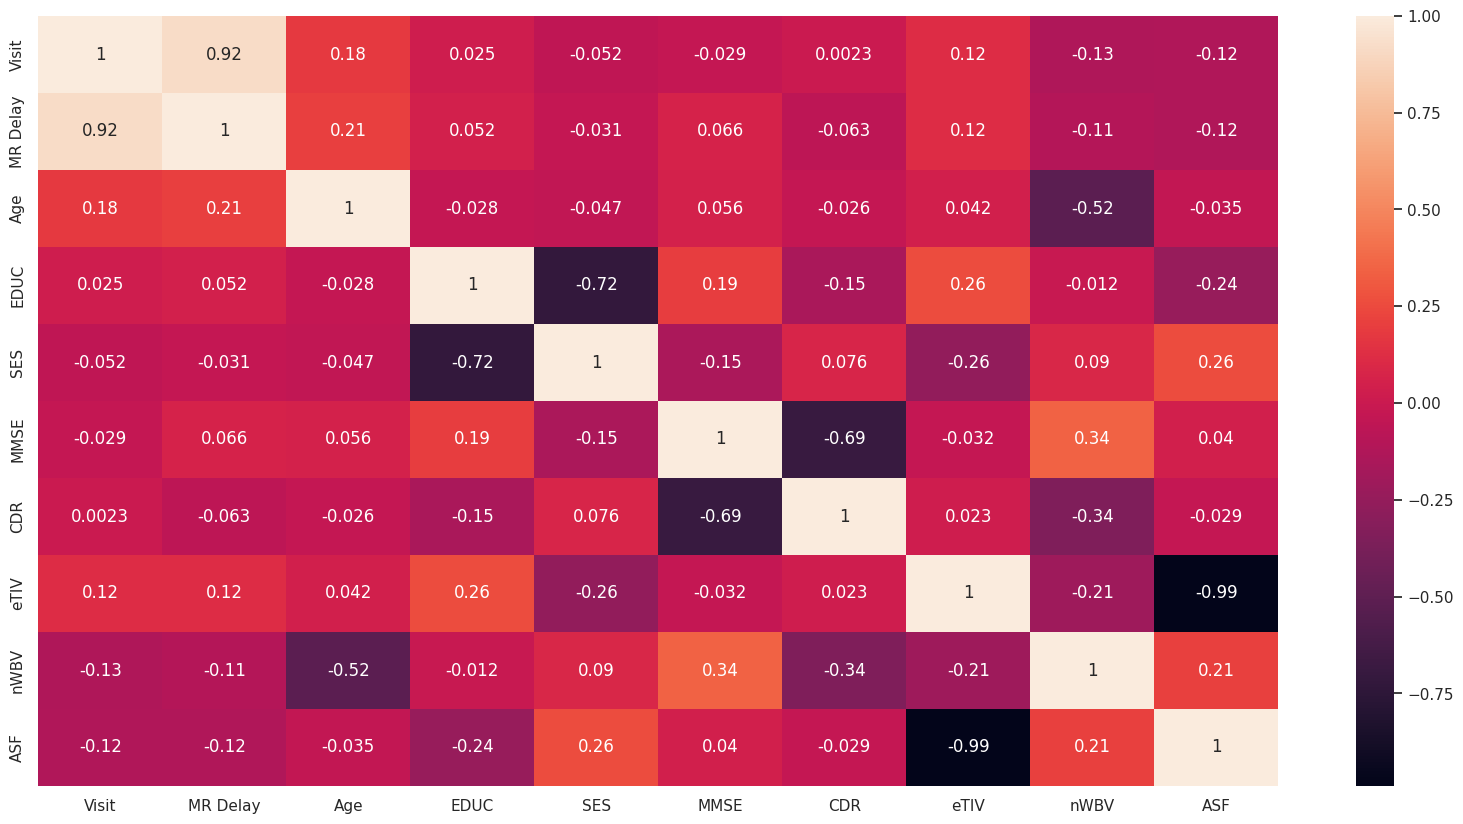

In [157]:
numeric_df = df.select_dtypes(include=['number'])
cor_matrix = numeric_df.corr()
print(cor_matrix)
plt.figure(figsize=(20,10))
sns.heatmap(cor_matrix, annot=True)

In [158]:
df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/dataset.csv")
print(df.columns)
df = df.loc[df['Visit']==1] # use first visit data only because of the analysis we're doing
df = df.reset_index(drop=True) # reset index after filtering first visit data
df['M/F'] = df['M/F'].replace(['F','M'], [0,1]) # M/F column
df['Group'] = df['Group'].replace(['Converted'], ['Demented']) # Target variable
df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0]) # Target variable
df = df.drop(['MRI ID','MR Delay','Visit', 'Hand'], axis=1) # Drop unnecessary columns
print(df.columns)

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')
Index(['Subject ID', 'Group', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR',
       'eTIV', 'nWBV', 'ASF'],
      dtype='object')


          Group       M/F       Age      EDUC       SES      MMSE       CDR  \
Group  1.000000  0.210282  0.002058 -0.212378  0.068819 -0.530773  0.768221   
M/F    0.210282  1.000000 -0.062457  0.070563 -0.033024 -0.218365  0.203178   
Age    0.002058 -0.062457  1.000000 -0.065513 -0.016734 -0.022629 -0.039313   
EDUC  -0.212378  0.070563 -0.065513  1.000000 -0.725770  0.216439 -0.227556   
SES    0.068819 -0.033024 -0.016734 -0.725770  1.000000 -0.180484  0.137950   
MMSE  -0.530773 -0.218365 -0.022629  0.216439 -0.180484  1.000000 -0.691874   
CDR    0.768221  0.203178 -0.039313 -0.227556  0.137950 -0.691874  1.000000   
eTIV  -0.031369  0.571898 -0.009693  0.236263 -0.244047 -0.051549  0.037608   
nWBV  -0.265774 -0.241635 -0.558027  0.048484  0.028227  0.322025 -0.310813   
ASF    0.021365 -0.564241  0.020708 -0.218819  0.235480  0.059661 -0.039840   

           eTIV      nWBV       ASF  
Group -0.031369 -0.265774  0.021365  
M/F    0.571898 -0.241635 -0.564241  
Age   -0.009693 

<Axes: >

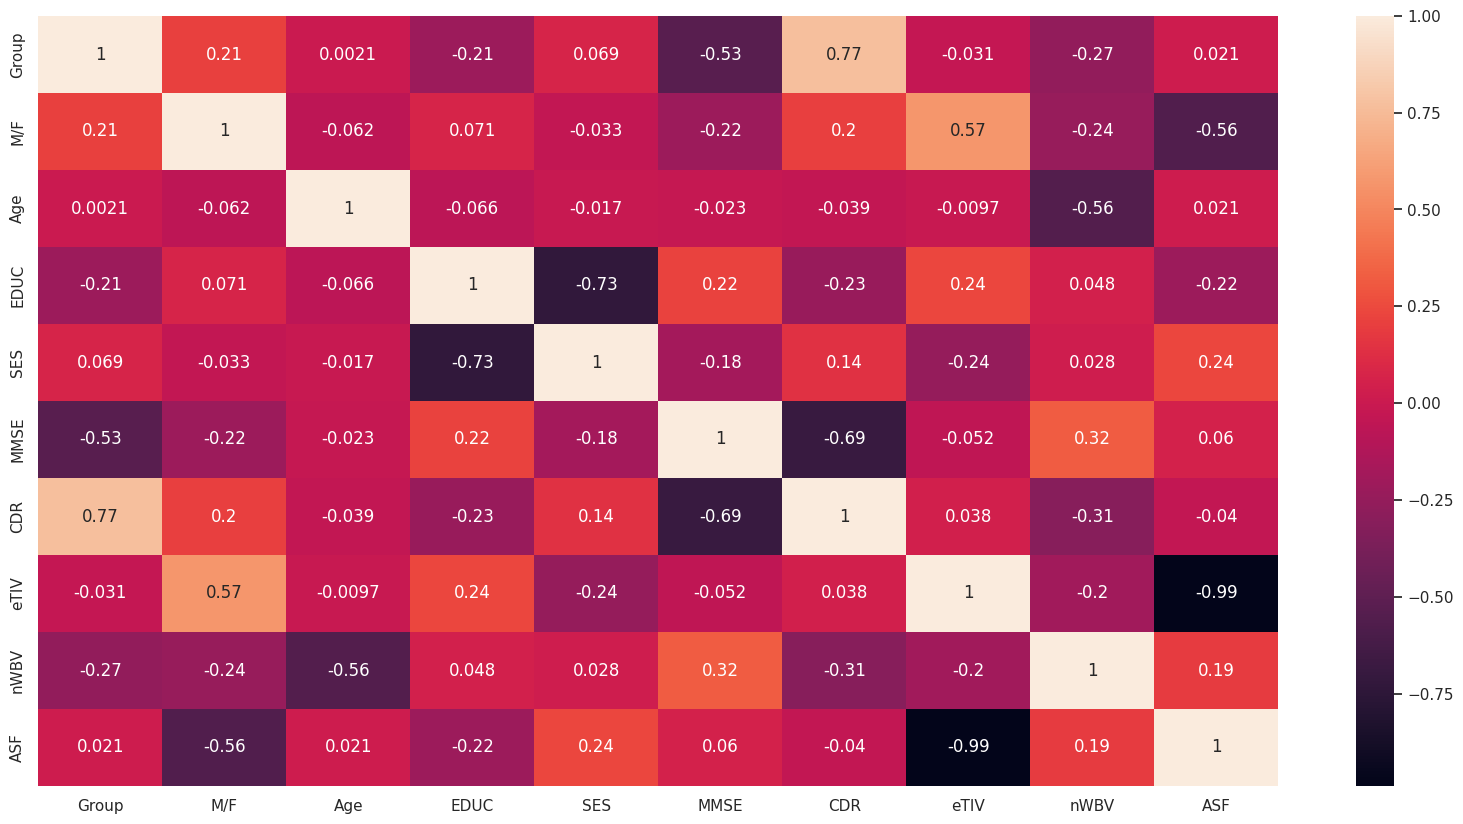

In [159]:
numeric_df = df.select_dtypes(include=['number'])
cor_matrix = numeric_df.corr()
print(cor_matrix)
plt.figure(figsize=(20,10))
sns.heatmap(cor_matrix, annot=True)

In [160]:
# bar drawing function
def bar_chart(feature):
    Demented = df[df['Group']==1][feature].value_counts()
    Nondemented = df[df['Group']==0][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))

Text(0.5, 1.0, 'Gender and Demented rate')

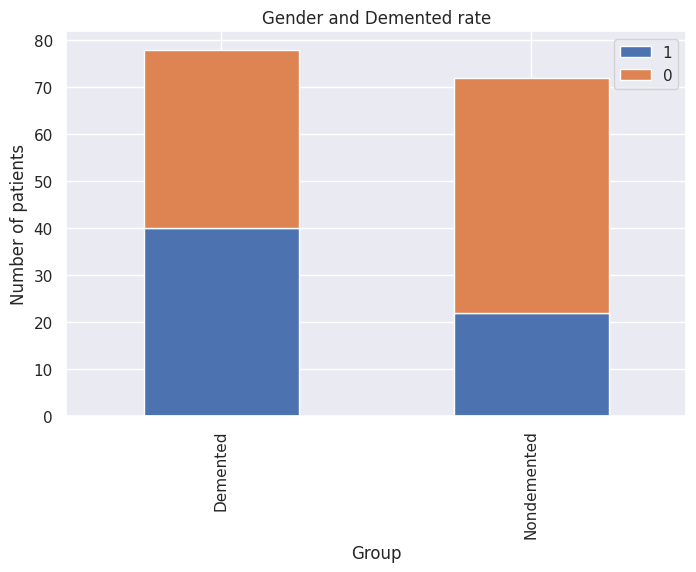

In [161]:
# Gender  and  Group ( Femal=0, Male=1)
bar_chart('M/F')
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.legend()
plt.title('Gender and Demented rate')

(15.0, 30.0)

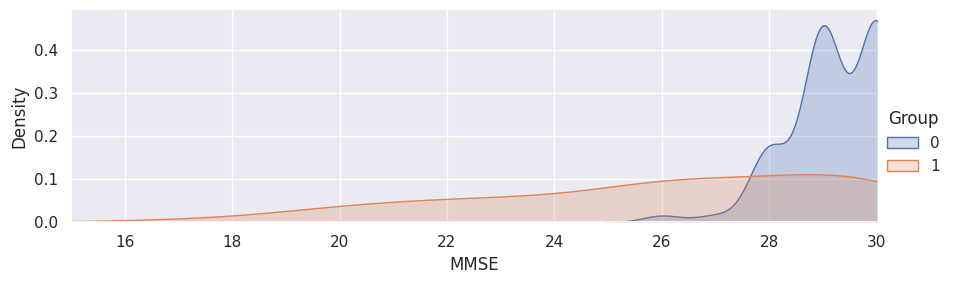

In [162]:
#MMSE : Mini Mental State Examination
# Nondemented = 0, Demented =1
# Nondemented has higher test result ranging from 25 to 30.
#Min 17 ,MAX 30
facet = sns.FacetGrid(df, hue="Group", aspect=3)
facet.map(sns.kdeplot, 'MMSE', fill=True)
facet.set(xlim=(0, df['MMSE'].max()))
facet.add_legend()
plt.xlim(15, 30)


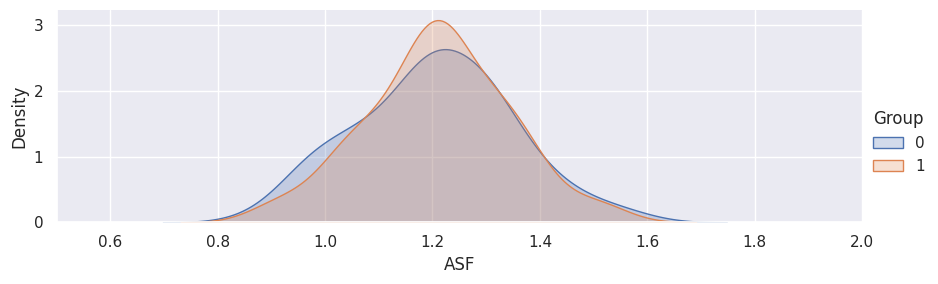

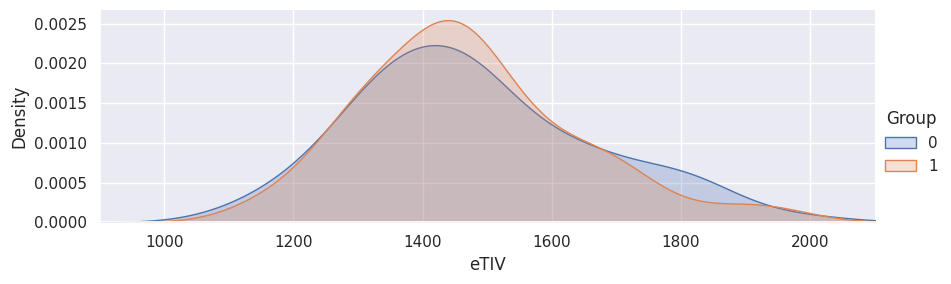

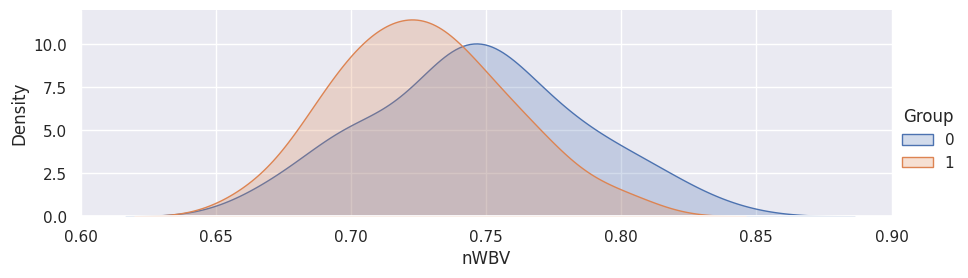

In [163]:
features = ['ASF', 'eTIV', 'nWBV']
xlims = [(0.5, 2), (900, 2100), (0.6, 0.9)]

for feature, xlim in zip(features, xlims):
    facet = sns.FacetGrid(df, hue="Group", aspect=3)
    facet.map(sns.kdeplot, feature, fill=True)
    facet.set(xlim=(0, df[feature].max()))
    facet.add_legend()
    plt.xlim(xlim)
    plt.show()  # Show each plot separately


(50.0, 100.0)

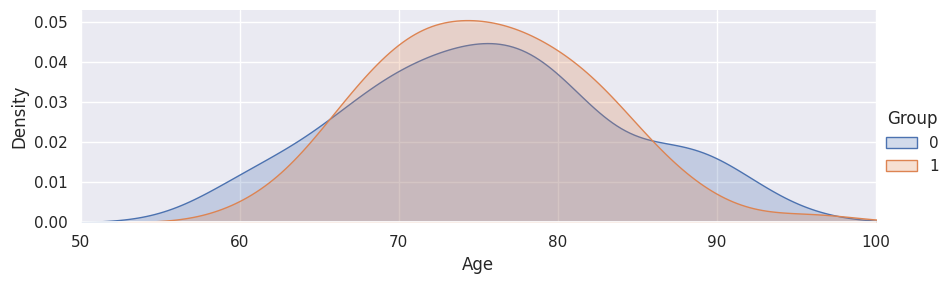

In [164]:
facet = sns.FacetGrid(df, hue="Group", aspect=3)
facet.map(sns.kdeplot, 'Age', fill=True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(50, 100)


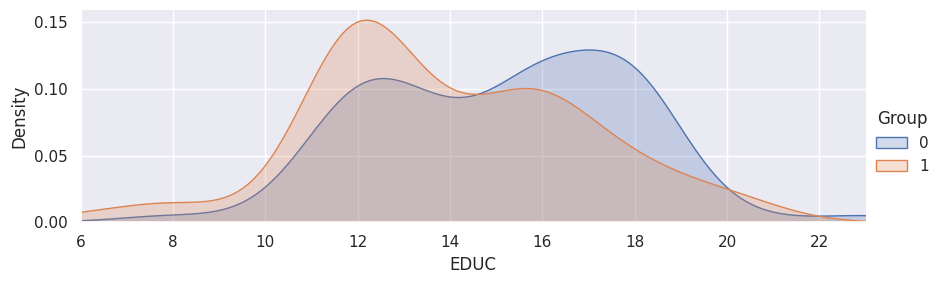

In [165]:
#'EDUC' = Years of Education
# Nondemented = 0, Demented =1
facet = sns.FacetGrid(df, hue="Group", aspect=3)
facet.map(sns.kdeplot, 'EDUC', fill=True)
facet.set(xlim=(df['EDUC'].min(), df['EDUC'].max()))
facet.add_legend()

In [166]:
# Check missing values by each column
pd.isnull(df).sum()
# The column, SES has 8 missing values

Subject ID    0
Group         0
M/F           0
Age           0
EDUC          0
SES           8
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [167]:
# Dropped the 8 rows with missing values in the column, SES
df_dropna = df.dropna(axis=0, how='any')
pd.isnull(df_dropna).sum()

Subject ID    0
Group         0
M/F           0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [168]:
df_dropna['Group'].value_counts()

Group
0    72
1    70
Name: count, dtype: int64

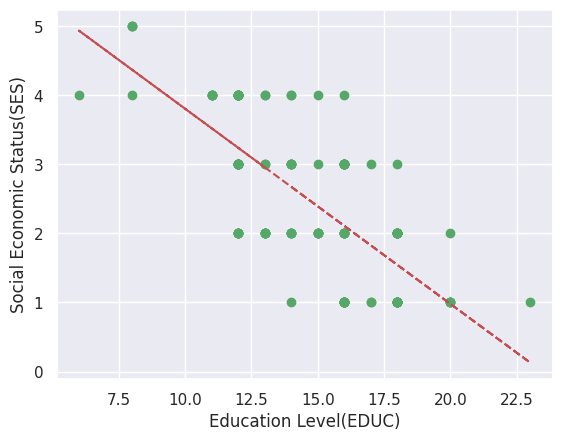

In [169]:
# Draw scatter plot between EDUC and SES
x = df['EDUC']
y = df['SES']

ses_not_null_index = y[~y.isnull()].index
x = x[ses_not_null_index]
y = y[ses_not_null_index]

# Draw trend line in red
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, y, 'go', x, p(x), "r--")
plt.xlabel('Education Level(EDUC)')
plt.ylabel('Social Economic Status(SES)')

plt.show()

In [176]:
df.groupby(['EDUC'])['SES'].median()

EDUC
6     4.0
8     5.0
11    4.0
12    3.0
13    2.0
14    3.0
15    2.0
16    2.0
17    1.0
18    2.0
20    1.0
23    1.0
Name: SES, dtype: float64

In [174]:
df["SES"].fillna(df.groupby("EDUC")["SES"].transform("median"), inplace=True)

In [177]:
pd.isnull(df['SES']).value_counts()

SES
False    150
Name: count, dtype: int64

In [178]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

In [179]:
from collections import Counter
from imblearn.over_sampling import SMOTE
# Dataset with imputation
Y = df['Group'].values # Target for the model
X = df[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]



# splitting into three sets
X_trainval, X_test, Y_trainval, Y_test = train_test_split( X, Y, random_state=0)
# create artificial data with SMOTE
oversample = SMOTE()
X_trainval, Y_trainval = oversample.fit_resample(X,Y)

# Feature scaling
scaler = MinMaxScaler().fit(X_trainval)
X_trainval_scaled = scaler.transform(X_trainval)
X_test_scaled = scaler.transform(X_test)

count = Counter(Y_trainval )
print(count)

Counter({0: 78, 1: 78})


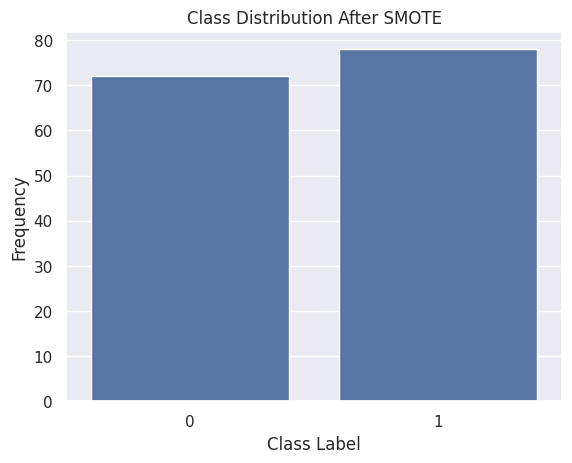

In [180]:
# Assuming your target variable after applying SMOTE is stored in a variable named 'target_after_smote'
sns.countplot(x='Group', data=df)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.show()


In [181]:
# Dataset after dropping missing value rows
Y = df_dropna['Group'].values # Target for the model
X = df_dropna[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]
 # Features we use

# splitting into three sets
X_trainval_dna, X_test_dna, Y_trainval_dna, Y_test_dna = train_test_split(
    X, Y, random_state=0)

# Feature scaling
scaler = MinMaxScaler().fit(X_trainval_dna)
X_trainval_scaled_dna = scaler.transform(X_trainval_dna)
X_test_scaled_dna = scaler.transform(X_test_dna)

          Group       M/F       Age      EDUC       SES      MMSE       CDR  \
Group  1.000000  0.212298  0.000799  0.182332  0.068819  0.533488  0.759728   
M/F    0.212298  1.000000  0.050858  0.071606  0.033024  0.203597  0.204831   
Age    0.000799  0.050858  1.000000  0.060296  0.016734  0.029735  0.041102   
EDUC   0.182332  0.071606  0.060296  1.000000  0.725770  0.203361  0.205277   
SES    0.068819  0.033024  0.016734  0.725770  1.000000  0.180484  0.137950   
MMSE   0.533488  0.203597  0.029735  0.203361  0.180484  1.000000  0.699752   
CDR    0.759728  0.204831  0.041102  0.205277  0.137950  0.699752  1.000000   
eTIV   0.026861  0.569173  0.010867  0.248045  0.244047  0.034765  0.043814   
nWBV   0.267081  0.235480  0.568690  0.039323  0.028227  0.318791  0.312147   
ASF    0.016288  0.561735  0.023547  0.230543  0.235480  0.045040  0.046499   

           eTIV      nWBV       ASF  
Group  0.026861  0.267081  0.016288  
M/F    0.569173  0.235480  0.561735  
Age    0.010867 

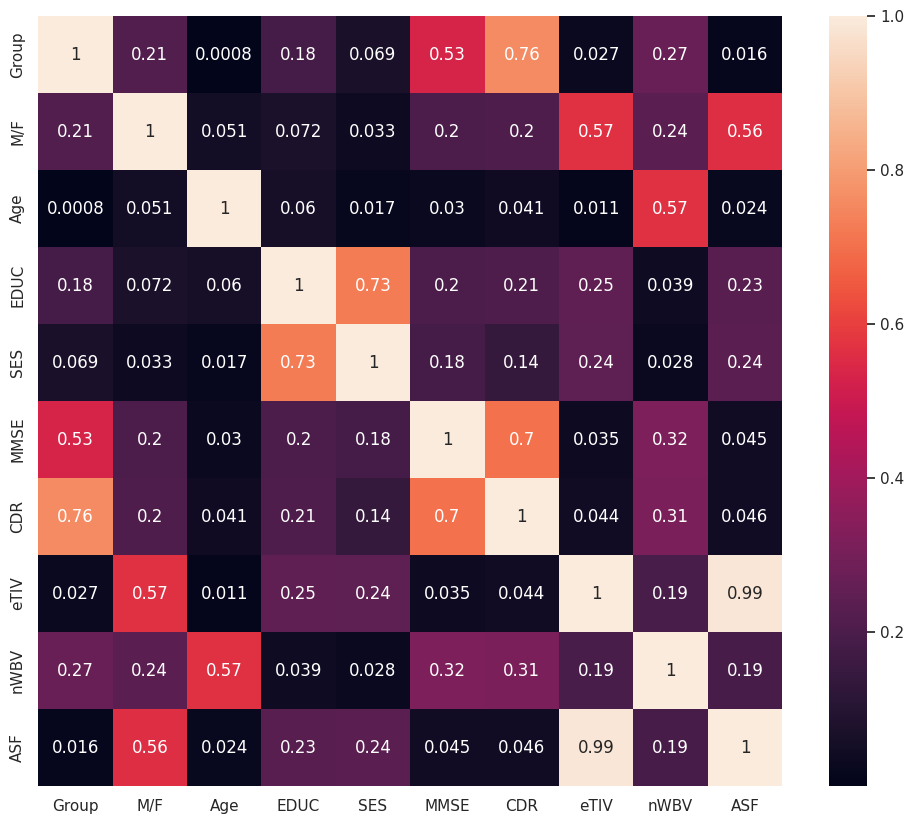

In [182]:
numeric_df = df_dropna.select_dtypes(include=['number'])
cor_matrix = numeric_df.corr().abs()
print(cor_matrix)
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(cor_matrix, annot=True)  # Adjust the color map and annotation format if necessary
plt.show()


# **Logistic** **Regression**

The parameter C, inverse of regularization strength.

Tuning range: [0.001, 0.1, 1, 10, 100]

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc,f1_score,precision_score

In [184]:
acc = [] # list to store all performance metric

estimator = []

# Dataset after dropping missing value rows
best_score=0
kfolds=5 # set the number of folds

for c in [0.001, 0.1, 1, 10, 100]:
    logRegModel = LogisticRegression(C=c)
    # perform cross-validation
    scores = cross_val_score(logRegModel, X_trainval_scaled_dna, Y_trainval_dna, cv=kfolds, scoring='accuracy')

    # compute mean cross-validation accuracy
    score = np.mean(scores)

    # Find the best parameters and score
    if score > best_score:
        best_score = score
        best_parameters = c

# rebuild a model on the combined training and validation set
SelectedLogRegModel = LogisticRegression(C=best_parameters).fit(X_trainval_scaled_dna, Y_trainval_dna)
#estimator.append(('LR',LogisticRegression(C=best_parameters)))

test_score = SelectedLogRegModel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedLogRegModel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
test_F1_score=f1_score(Y_test, PredictedOutput, pos_label=1)
test_precision=precision_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter for regularization (C) is: ", best_parameters)
print("Test accuracy with best C parameter is", test_score)
print("Test recall with the best C parameter is", test_recall)
print("Test F1_score with the best C parameter is", test_F1_score)
print("Test Precision with the best C parameter is", test_precision)
print("Test AUC with the best C parameter is", test_auc)

m = 'Logistic Regression (w/ dropna)'
#acc.append([m, test_score, test_recall,test_F1_score,test_precision,test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.725974025974026
Best parameter for regularization (C) is:  10
Test accuracy with best C parameter is 0.8421052631578947
Test recall with the best C parameter is 0.8
Test F1_score with the best C parameter is 0.8421052631578948
Test Precision with the best C parameter is 0.8888888888888888
Test AUC with the best C parameter is 0.8444444444444443


# **SVM**

 Penalty parameter C of the error term. [0.001, 0.01, 0.1, 1, 10, 100, 1000]

gamma: kernel coefficient. [0.001, 0.01, 0.1, 1, 10, 100, 1000]

kernel: kernel type. ['rbf', 'linear', 'poly', 'sigmoid']

In [205]:
best_score = 0

for c_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: #iterate over the values we need to try for the parameter C
    for gamma_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: #iterate over the values we need to try for the parameter gamma
        for k_parameter in ['rbf', 'linear', 'poly', 'sigmoid']: # iterate over the values we need to try for the kernel parameter
            svmModel = SVC(kernel=k_parameter, C=c_paramter, gamma=gamma_paramter) #define the model
            # perform cross-validation
            scores = cross_val_score(svmModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')
            # the training set will be split internally into training and cross validation

            # compute mean cross-validation accuracy
            score = np.mean(scores)
            # if we got a better score, store the score and parameters
            if score > best_score:
                best_score = score #store the score
                best_parameter_c = c_paramter #store the parameter c
                best_parameter_gamma = gamma_paramter #store the parameter gamma
                best_parameter_k = k_parameter


# rebuild a model with best parameters to get score
SelectedSVMmodel = SVC(C=best_parameter_c, gamma=best_parameter_gamma, kernel=best_parameter_k).fit(X_trainval_scaled, Y_trainval)
#estimator.append(('SVM',SVC(C=best_parameter_c, gamma=best_parameter_gamma, kernel=best_parameter_k)))
test_score = SelectedLogRegModel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedLogRegModel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
test_F1_score=f1_score(Y_test, PredictedOutput, pos_label=1)
test_precision=precision_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter for regularization (C) is: ", best_parameters)
print("Test accuracy with best C parameter is", test_score)
print("Test recall with the best C parameter is", test_recall)
print("Test F1_score with the best C parameter is", test_F1_score)
print("Test Precision with the best C parameter is", test_precision)
print("Test AUC with the best C parameter is", test_auc)
m = 'SVM'
#acc.append([m, test_score, test_recall,test_F1_score,test_precision,test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.7814516129032258
Best parameter for regularization (C) is:  10
Test accuracy with best C parameter is 0.8421052631578947
Test recall with the best C parameter is 0.8
Test F1_score with the best C parameter is 0.8421052631578948
Test Precision with the best C parameter is 0.8888888888888888
Test AUC with the best C parameter is 0.8444444444444443


#**Decision** **Tree**

Maximum depth. [1, 2, ..., 8]

8 is the number of features

In [206]:
best_score = 0

for md in range(1, 9): # iterate different maximum depth values
    # train the model
    treeModel = DecisionTreeClassifier(random_state=0, max_depth=md, criterion='gini')
    # perform cross-validation
    scores = cross_val_score(treeModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')

    # compute mean cross-validation accuracy
    score = np.mean(scores)

    # if we got a better score, store the score and parameters
    if score > best_score:
        best_score = score
        best_parameter = md

# Rebuild a model on the combined training and validation set
SelectedDTModel = DecisionTreeClassifier(max_depth=best_parameter).fit(X_trainval_scaled, Y_trainval )
#estimator.append(('DT',DecisionTreeClassifier(max_depth=best_parameter)))

test_score = SelectedDTModel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedDTModel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
test_F1_score=f1_score(Y_test, PredictedOutput, pos_label=1)
test_precision=precision_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter for regularization (C) is: ", best_parameters)
print("Test accuracy with best C parameter is", test_score)
print("Test recall with the best C parameter is", test_recall)
print("Test F1_score with the best C parameter is", test_F1_score)
print("Test Precision with the best C parameter is", test_precision)
print("Test AUC with the best C parameter is", test_auc)

m = 'Decision Tree'
#acc.append([m, test_score, test_recall,test_F1_score,test_precision,test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.794758064516129
Best parameter for regularization (C) is:  10
Test accuracy with best C parameter is 0.8157894736842105
Test recall with the best C parameter is 0.65
Test F1_score with the best C parameter is 0.787878787878788
Test Precision with the best C parameter is 1.0
Test AUC with the best C parameter is 0.825


In [207]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(SelectedDTModel.feature_importances_)]).T

Feature importance: 


array([['M/F', '0.0'],
       ['Age', '0.0'],
       ['EDUC', '0.0'],
       ['SES', '0.0'],
       ['MMSE', '1.0'],
       ['eTIV', '0.0'],
       ['nWBV', '0.0'],
       ['ASF', '0.0']], dtype='<U32')

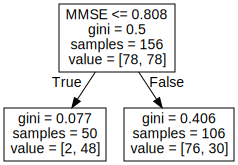

In [208]:
from sklearn.tree import export_graphviz
import graphviz
dot_data=export_graphviz(SelectedDTModel, feature_names=X_trainval.columns.values.tolist(),out_file=None)
graph = graphviz.Source(dot_data)
graph

# **Random** **Forest** **Classifier**

n_estimators(M): the number of trees in the forest

max_features(d): the number of features to consider when looking for the best split

max_depth(m): the maximum depth of the tree.

In [209]:
best_score = 0

for M in range(2, 15, 2): # combines M trees
    for d in range(1, 9): # maximum number of features considered at each split
        for m in range(1, 9): # maximum depth of the tree
            # train the model
            # n_jobs(4) is the number of parallel computing
            forestModel = RandomForestClassifier(n_estimators=M, max_features=d, n_jobs=4,
                                          max_depth=m, random_state=0)

            # perform cross-validation
            scores = cross_val_score(forestModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')

            # compute mean cross-validation accuracy
            score = np.mean(scores)

            # if we got a better score, store the score and parameters
            if score > best_score:
                best_score = score
                best_M = M
                best_d = d
                best_m = m

# Rebuild a model on the combined training and validation set
SelectedRFModel = RandomForestClassifier(n_estimators=M, max_features=d,
                                          max_depth=m, random_state=0).fit(X_trainval_scaled, Y_trainval )

estimator.append(('RT',RandomForestClassifier(n_estimators=M, max_features=d,
                                          max_depth=m, random_state=0)))
PredictedOutput = SelectedRFModel.predict(X_test_scaled)
test_score = SelectedRFModel.score(X_test_scaled, Y_test)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
test_F1_score=f1_score(Y_test, PredictedOutput, pos_label=1)
test_precision=precision_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter for regularization (C) is: ", best_parameters)
print("Test accuracy with best C parameter is", test_score)
print("Test recall with the best C parameter is", test_recall)
print("Test F1_score with the best C parameter is", test_F1_score)
print("Test Precision with the best C parameter is", test_precision)
print("Test AUC with the best C parameter is", test_auc)

m = 'Random Forest'
#acc.append([m, test_score, test_recall,test_F1_score,test_precision,test_auc, fpr, tpr, thresholds])



Best accuracy on validation set is: 0.8012096774193548
Best parameter for regularization (C) is:  10
Test accuracy with best C parameter is 0.9736842105263158
Test recall with the best C parameter is 0.95
Test F1_score with the best C parameter is 0.9743589743589743
Test Precision with the best C parameter is 1.0
Test AUC with the best C parameter is 0.975


In [210]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(SelectedRFModel.feature_importances_)]).T

Feature importance: 


array([['M/F', '0.025242472158810147'],
       ['Age', '0.08088541412277502'],
       ['EDUC', '0.06835507420094823'],
       ['SES', '0.06945983490587442'],
       ['MMSE', '0.42488296609798'],
       ['eTIV', '0.09212969735727856'],
       ['nWBV', '0.14038715923376993'],
       ['ASF', '0.09865738192256376']], dtype='<U32')

# **Adaboost**

In [211]:
best_score = 0

for M in range(2, 15, 2): # combines M trees
    for lr in [0.0001, 0.001, 0.01, 0.1, 1]:
        # train the model
        boostModel = AdaBoostClassifier(n_estimators=M, learning_rate=lr, random_state=0)

        # perform cross-validation
        scores = cross_val_score(boostModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')

        # compute mean cross-validation accuracy
        score = np.mean(scores)

        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_M = M
            best_lr = lr

# Rebuild a model on the combined training and validation set
SelectedBoostModel = AdaBoostClassifier(n_estimators=M, learning_rate=lr, random_state=0).fit(X_trainval_scaled, Y_trainval )
estimator.append(('AB',AdaBoostClassifier(n_estimators=M, learning_rate=lr, random_state=0)))

PredictedOutput = SelectedBoostModel.predict(X_test_scaled)
test_score = SelectedRFModel.score(X_test_scaled, Y_test)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
test_F1_score=f1_score(Y_test, PredictedOutput, pos_label=1)
test_precision=precision_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter for regularization (C) is: ", best_parameters)
print("Test accuracy with best C parameter is", test_score)
print("Test recall with the best C parameter is", test_recall)
print("Test F1_score with the best C parameter is", test_F1_score)
print("Test Precision with the best C parameter is", test_precision)
print("Test AUC with the best C parameter is", test_auc)
m = 'AdaBoost'
#acc.append([m, test_score, test_recall,test_F1_score,test_precision,test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.794758064516129
Best parameter for regularization (C) is:  10
Test accuracy with best C parameter is 0.9736842105263158
Test recall with the best C parameter is 0.8
Test F1_score with the best C parameter is 0.888888888888889
Test Precision with the best C parameter is 1.0
Test AUC with the best C parameter is 0.9


In [192]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(SelectedBoostModel.feature_importances_)]).T

Feature importance: 


array([['M/F', '0.07142857142857142'],
       ['Age', '0.14285714285714285'],
       ['EDUC', '0.07142857142857142'],
       ['SES', '0.07142857142857142'],
       ['MMSE', '0.14285714285714285'],
       ['eTIV', '0.14285714285714285'],
       ['nWBV', '0.35714285714285715'],
       ['ASF', '0.0']], dtype='<U32')

# **LightGBM**

In [212]:
import lightgbm

best_score = 0

for M in range(2, 15, 2): # combines M trees
    for lr in [0.0001, 0.001, 0.01, 0.1, 1]:
        # train the model
        LGBMModel = lightgbm.LGBMClassifier(n_estimators=M, learning_rate=lr, random_state=0)

        # perform cross-validation
        scores = cross_val_score(LGBMModel, X_trainval, Y_trainval, cv=kfolds, scoring='accuracy')

        # compute mean cross-validation accuracy
        score = np.mean(scores)

        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_M = M
            best_lr = lr

# Rebuild a model on the combined training and validation set
SelectedLGBMModel = lightgbm.LGBMClassifier(n_estimators=M, learning_rate=lr, random_state=0).fit(X_trainval, Y_trainval )

PredictedOutput = SelectedLGBMModel.predict(X_test_scaled)
test_score = SelectedLGBMModel.score(X_test_scaled, Y_test)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
test_F1_score=f1_score(Y_test, PredictedOutput, pos_label=1)
test_precision=precision_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter for regularization (C) is: ", best_parameters)
print("Test accuracy with best C parameter is", test_score)
print("Test recall with the best C parameter is", test_recall)
print("Test F1_score with the best C parameter is", test_F1_score)
print("Test Precision with the best C parameter is", test_precision)
print("Test AUC with the best C parameter is", test_auc)

m = 'LightGBM'
#acc.append([m, test_score, test_recall,test_F1_score,test_precision,test_auc, fpr, tpr, thresholds])

[LightGBM] [Info] Number of positive: 62, number of negative: 62
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 175
[LightGBM] [Info] Number of data points in the train set: 124, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 63, number of negative: 62
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 173
[LightGBM] [Info] Number of data points in the train set: 125, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504000 -> initscore=0

In [213]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(SelectedBoostModel.feature_importances_)]).T

Feature importance: 


array([['M/F', '0.07142857142857142'],
       ['Age', '0.14285714285714285'],
       ['EDUC', '0.07142857142857142'],
       ['SES', '0.07142857142857142'],
       ['MMSE', '0.14285714285714285'],
       ['eTIV', '0.14285714285714285'],
       ['nWBV', '0.35714285714285715'],
       ['ASF', '0.0']], dtype='<U32')

# **XGBoost**

In [214]:
import xgboost as xgb

best_score = 0

for M in range(2, 15, 2): # combines M trees
    for lr in [0.0001, 0.001, 0.01, 0.1, 1]:
        # train the model
        XGBRFmodel = xgb.XGBRFClassifier(n_estimators=M, learning_rate=lr, random_state=0)

        # perform cross-validation
        scores = cross_val_score(XGBRFmodel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')

        # compute mean cross-validation accuracy
        score = np.mean(scores)

        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_M = M
            best_lr = lr

# Rebuild a model on the combined training and validation set
SelectedXGBRFModel = xgb.XGBRFClassifier(n_estimators=M, learning_rate=lr, random_state=0).fit(X_trainval_scaled, Y_trainval )
#estimator.append(('XGB',xgb.XGBRFClassifier(n_estimators=M, learning_rate=lr, random_state=0)))


PredictedOutput = SelectedXGBRFModel.predict(X_test_scaled)
test_score = SelectedXGBRFModel.score(X_test_scaled, Y_test)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
test_F1_score=f1_score(Y_test, PredictedOutput, pos_label=1)
test_precision=precision_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter for regularization (C) is: ", best_parameters)
print("Test accuracy with best C parameter is", test_score)
print("Test recall with the best C parameter is", test_recall)
print("Test F1_score with the best C parameter is", test_F1_score)
print("Test Precision with the best C parameter is", test_precision)
print("Test AUC with the best C parameter is", test_auc)

m = 'XGBRFClassifier'
#acc.append([m, test_score, test_recall,test_F1_score,test_precision,test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.7754032258064516
Best parameter for regularization (C) is:  10
Test accuracy with best C parameter is 0.9210526315789473
Test recall with the best C parameter is 0.85
Test F1_score with the best C parameter is 0.9189189189189189
Test Precision with the best C parameter is 1.0
Test AUC with the best C parameter is 0.925


In [215]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(SelectedBoostModel.feature_importances_)]).T

Feature importance: 


array([['M/F', '0.07142857142857142'],
       ['Age', '0.14285714285714285'],
       ['EDUC', '0.07142857142857142'],
       ['SES', '0.07142857142857142'],
       ['MMSE', '0.14285714285714285'],
       ['eTIV', '0.14285714285714285'],
       ['nWBV', '0.35714285714285715'],
       ['ASF', '0.0']], dtype='<U32')

# **Voting** **Classifier**

In [253]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score, precision_score, roc_curve, auc

# Assuming you have your data loaded and preprocessed as X_trainval_scaled, X_test_scaled, Y_trainval, and Y_test

# Define and train the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Fit the RandomForestClassifier
rf_classifier.fit(X_trainval_scaled, Y_trainval)

# Create the voting classifier with only the RandomForestClassifier
voting_model = VotingClassifier(estimators=[
    ('random_forest', rf_classifier)
], voting='soft')

# Train the voting classifier
voting_model.fit(X_trainval_scaled, Y_trainval)

# Predict on the test set
predicted_output = voting_model.predict(X_test_scaled)

# Calculate various evaluation metrics
test_score = voting_model.score(X_test_scaled, Y_test)
test_recall = recall_score(Y_test, predicted_output, pos_label=1)
test_f1_score = f1_score(Y_test, predicted_output, pos_label=1)
test_precision = precision_score(Y_test, predicted_output, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, predicted_output, pos_label=1)
test_auc = auc(fpr, tpr)
# Print evaluation metrics
print("Best accuracy on validation set:", best_score)
print("Best parameter for regularization (C):", best_parameters)
print("Test accuracy with the best C parameter:", test_score)
print("Test recall with the best C parameter:", test_recall)
print("Test F1 score with the best C parameter:", test_f1_score)
print("Test precision with the best C parameter:", test_precision)
print("Test AUC with the best C parameter:", test_auc)

m = 'Voting Classifier'
acc.clear()
acc.append([m, test_score, test_recall,test_f1_score,test_precision,test_auc, fpr, tpr, thresholds])


Best accuracy on validation set: 0.7754032258064516
Best parameter for regularization (C): 10
Test accuracy with the best C parameter: 1.0
Test recall with the best C parameter: 1.0
Test F1 score with the best C parameter: 1.0
Test precision with the best C parameter: 1.0
Test AUC with the best C parameter: 1.0


# **CONCLUSION**

# **Results**

In [254]:
import pandas as pd
# Performance Metric for each model
result = pd.DataFrame(acc, columns=['Model', 'Accuracy', 'Recall', 'F1-Score','Precision', 'AUC', 'FPR', 'TPR', 'TH'])
result[['Model', 'Accuracy', 'Recall','F1-Score','Precision' ,'AUC']]

,Model,Accuracy,Recall,F1-Score,Precision,AUC
0,Voting Classifier,1.0,1.0,1.0,1.0,1.0


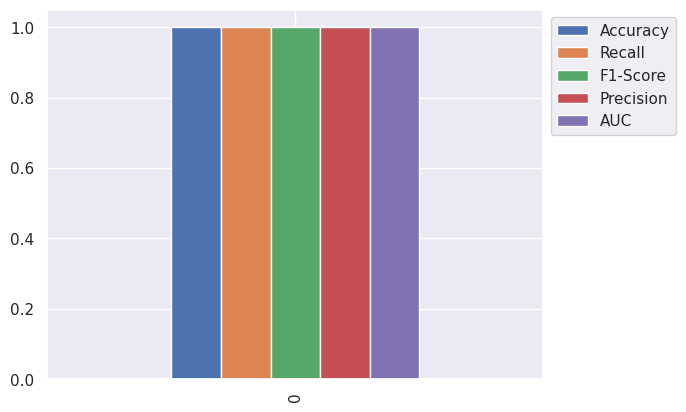

In [255]:
# results graph
result.plot.bar()
#plt.xticks(range(8), result["Model"])
plt.legend(bbox_to_anchor=(1, 1));

In [274]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues'):
    """
    This function will make a pretty plot of an sklearn Confusion Matrix cf using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
    """

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    plt.show()


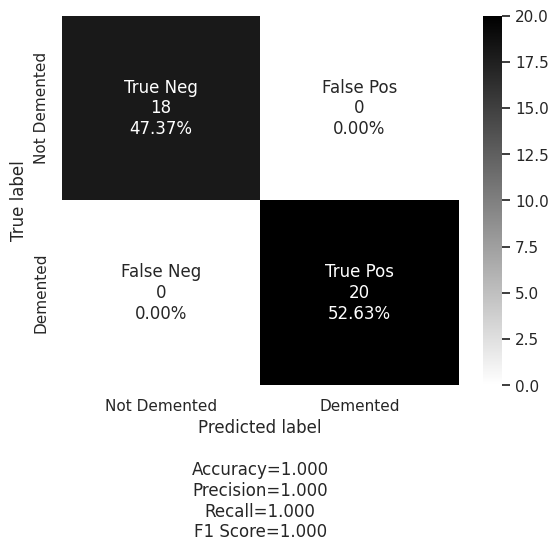

In [277]:
from sklearn.metrics import confusion_matrix

# Assuming you have 'Y_test' as true labels
cf_matrix_true = confusion_matrix(Y_test, Y_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Not Demented', 'Demented']

make_confusion_matrix(cf_matrix_true,
                      group_names=labels,
                      categories=categories,
                      cmap='binary')


In [282]:
# saving the results
result.to_csv("/content/drive/MyDrive/ColabNotebooks/Results.csv")

In [283]:
# saving the best performing model
import pickle
pickle.dump(SelectedvotingModel, open("/content/drive/MyDrive/ColabNotebooks/VotingClassifier.pkl", "wb"))

In [284]:
# loading the model and making predictions
model = pickle.load(open("/content/drive/MyDrive/ColabNotebooks/VotingClassifier.pkl", "rb"))
model.score(X_test_scaled, Y_test)

1.0

In [285]:
def alzheimer_prediction(input_data):


    # changing the input_data to numpy array
    input_data_as_numpy_array = np.asarray(input_data)

    # reshape the array as we are predicting for one instance
    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

    prediction = model.predict(input_data_reshaped)
    print(prediction)

    if (prediction[0] == 0):
      return 'The Person does not have Alzheimer Disease'
    else:
      return 'The Person has Alzheimer Disease'

alzheimer_prediction([[1,87,14,2,0,1987,0.696,0.883 ]])
#alzheimer_prediction([[0,75,16,1,28,1314,0.76,1.335]])

[1]


'The Person has Alzheimer Disease'